# Maize and Wheat Production Indices

## Introduction

The agricultural Gross Production Index (GPI) is prepared by the Food and Agriculture Organization of the United Nations (FAO). The FAO indices of agricultural production show the relative level of the aggregate volume of agricultural production for each year in comparison with the base period 2014-2016. They are based on the sum of price-weighted quantities of different agricultural commodities produced after deductions of quantities used as seed and feed weighted in a similar manner. The resulting aggregate represents, therefore, disposable production for any use except as seed and feed. All the indices at the country, regional and world levels are calculated by the Laspeyres formula*. Production quantities of each commodity are weighted by 2014-2016 average international commodity prices and summed for each year. To obtain the index, the aggregate for a given year is divided by the average aggregate for the base period 2014-2016. Since the FAO indices are based on the concept of agriculture as a single enterprise, amounts of seed and feed are subtracted from the production data to avoid double counting, once in the production data and once with the crops or livestock produced from them.


## Preliminary Wrangling

This section contains a set of wrangling efforts to present the data in easy to visualise forms. Feature engineering was part of the wrangling to create a percentage change column amongst features of interest.

In [1]:
#import all necessary packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('Production_Indices_E_All_Data_NOFLAG.csv', encoding='latin-1')

In [3]:
print(df.shape)
#print(df_pi.dtypes)
print(df.head(10))

(37156, 67)
   Area Code         Area  Item Code                              Item  \
0          2  Afghanistan        221               Almonds, with shell   
1          2  Afghanistan        221               Almonds, with shell   
2          2  Afghanistan        711  Anise, badian, fennel, coriander   
3          2  Afghanistan        711  Anise, badian, fennel, coriander   
4          2  Afghanistan        515                            Apples   
5          2  Afghanistan        515                            Apples   
6          2  Afghanistan        526                          Apricots   
7          2  Afghanistan        526                          Apricots   
8          2  Afghanistan         44                            Barley   
9          2  Afghanistan         44                            Barley   

   Element Code                                            Element   Unit  \
0           432    Gross Production Index Number (2014-2016 = 100)  index   
1           434  Gr

In [4]:
#We'll first make a copy of our original dataset
df_clean = df.copy()

> Changing column names

In [5]:
#Renaming columns in the pd_pi dataset
df_clean.rename(columns={'Area':'region', 'Item':'cereal'}, inplace=True)

In [6]:
print(df_clean.columns)

Index(['Area Code', 'region', 'Item Code', 'cereal', 'Element Code', 'Element',
       'Unit', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967',
       'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975',
       'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983',
       'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991',
       'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999',
       'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007',
       'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015',
       'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020'],
      dtype='object')


> Keeping desired 'Element' rows

In [7]:
df_clean = df_clean.apply(lambda row: row[df_clean['Element'].isin(['Gross Production Index Number (2014-2016 = 100)'])])

In [8]:
print(df_clean.Element.head())

0    Gross Production Index Number (2014-2016 = 100)
2    Gross Production Index Number (2014-2016 = 100)
4    Gross Production Index Number (2014-2016 = 100)
6    Gross Production Index Number (2014-2016 = 100)
8    Gross Production Index Number (2014-2016 = 100)
Name: Element, dtype: object


> Drop some columns

In [9]:
#First batch of columns to be dropped
columns_to_be_dropped = ['Area Code', 'Item Code', 'Element Code', 'Unit']
df_clean = df_clean.drop(columns= columns_to_be_dropped,axis=1)

In [10]:
print(df_clean.columns)

Index(['region', 'cereal', 'Element', 'Y1961', 'Y1962', 'Y1963', 'Y1964',
       'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972',
       'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980',
       'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988',
       'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996',
       'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004',
       'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012',
       'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020'],
      dtype='object')


> Query for only Maize and Wheat

In [11]:
#Query for only Maize and Wheat
df_clean = df_clean.apply(lambda row: row[df_clean['cereal'].isin(['Wheat','Maize'])])

In [12]:
print(df_clean.cereal.unique())

['Maize' 'Wheat']


> Drop certain columns

In [13]:
#Drop all other years leaving years 2001 to 2020 (20 years)
df_clean = df_clean.drop(df_clean.iloc[:, 3:43] , axis=1)

In [14]:
df_clean.columns

Index(['region', 'cereal', 'Element', 'Y2001', 'Y2002', 'Y2003', 'Y2004',
       'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012',
       'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020'],
      dtype='object')

In [15]:
#Melt all the individual year columns and drop all nulls simultaneously
df_clean = df_clean.melt(id_vars= ['region','cereal'], value_vars=df_clean.iloc[:, 3:], var_name='year', value_name = 'gpi').dropna()

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6969 entries, 0 to 7059
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   region  6969 non-null   object 
 1   cereal  6969 non-null   object 
 2   year    6969 non-null   object 
 3   gpi     6969 non-null   float64
dtypes: float64(1), object(3)
memory usage: 272.2+ KB


In [17]:
#Strip the 'Y' in all elements of the year column
df_clean['year'] = df_clean['year'].str[1:]
df_clean['year'].unique()

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020'], dtype=object)

In [18]:
#Make a copy of the data set
df_total = df_clean.copy()
df_total

,region,cereal,year,gpi
0,Afghanistan,Maize,2001,50.87
1,Afghanistan,Wheat,2001,32.82
2,Albania,Maize,2001,52.20
3,Albania,Wheat,2001,102.00
4,Algeria,Maize,2001,36.02
...,...,...,...,...
7055,Small Island Developing States,Wheat,2020,720.00
7056,Low Income Food Deficit Countries,Maize,2020,119.93
7057,Low Income Food Deficit Countries,Wheat,2020,115.23
7058,Net Food Importing Developing Countries,Maize,2020,117.26


#drop all country groupings
country_groups = ['Africa', 'Eastern Africa',
       'Middle Africa', 'Northern Africa', 'Southern Africa',
       'Western Africa', 'Americas', 'Northern America',
       'Central America', 'Caribbean', 'South America', 'Asia',
       'Central Asia', 'Eastern Asia', 'Southern Asia',
       'South-eastern Asia', 'Western Asia', 'Europe', 'Eastern Europe',
       'Northern Europe', 'Southern Europe', 'Western Europe', 'Oceania',
       'Australia and New Zealand', 'Melanesia', 'Micronesia',
       'Polynesia', 'European Union (27)', 'Least Developed Countries',
       'Land Locked Developing Countries',
       'Small Island Developing States',
       'Low Income Food Deficit Countries',
       'Net Food Importing Developing Countries']
df_pi_total = df_pi_total[~df_pi_total['country'].isin(country_groups)] #Tried a new drop method here
df_pi_total

In [19]:
woaf = df_clean.apply(lambda row: row[df_clean['region'].isin(['World', 'Africa'])])

In [20]:
woaf.head()

,region,cereal,year,gpi
289,World,Maize,2001,57.31
290,World,Wheat,2001,79.53
291,Africa,Maize,2001,54.62
292,Africa,Wheat,2001,69.76
642,World,Maize,2002,56.23


In [21]:
#convert the cereal and region columns to categories
cat1 = {'cereal': ['Wheat','Maize'], 'region' : ['World','Africa']}

for cat in cat1:
    to_category = pd.api.types.CategoricalDtype( categories = cat1[cat])
    woaf[cat] = woaf[cat].astype(to_category)
    
woaf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 289 to 6999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   region  80 non-null     category
 1   cereal  80 non-null     category
 2   year    80 non-null     object  
 3   gpi     80 non-null     float64 
dtypes: category(2), float64(1), object(1)
memory usage: 2.3+ KB


In [22]:
#We'll first separate the world data into wheat and maize datasets
woaf_maize = woaf.query('cereal == "Maize"')
woaf_wheat = woaf.query('cereal == "Wheat"')

In [23]:
world_maize = woaf.query('region == "World" & cereal == "Maize"')
africa_maize = woaf.query('region == "Africa" & cereal == "Maize"')

world_wheat = woaf.query('region == "World" & cereal == "Wheat"')
africa_wheat = woaf.query('region == "Africa" & cereal == "Wheat"')

In [24]:
africa_wheat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 292 to 6999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   region  20 non-null     category
 1   cereal  20 non-null     category
 2   year    20 non-null     object  
 3   gpi     20 non-null     float64 
dtypes: category(2), float64(1), object(1)
memory usage: 768.0+ bytes


In [25]:
#add percentage change column to to each datframe by calling the .pct_change
world_maize['change_rate'] = world_maize['gpi'].pct_change()
africa_maize['change_rate'] = africa_maize['gpi'].pct_change()

world_wheat['change_rate'] = world_wheat['gpi'].pct_change()
africa_wheat['change_rate'] = africa_wheat['gpi'].pct_change()

C:\Users\dell\AppData\Local\Temp\ipykernel_3736\2157029911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_maize['change_rate'] = world_maize['gpi'].pct_change()
C:\Users\dell\AppData\Local\Temp\ipykernel_3736\2157029911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  africa_maize['change_rate'] = africa_maize['gpi'].pct_change()
C:\Users\dell\AppData\Local\Temp\ipykernel_3736\2157029911.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [26]:
#We create a second master df to concat all the new data frames again
maize_list_ = ['world_maize','africa_maize']
wheat_list_ = ['world_wheat','africa_wheat']
woaf_final = pd.concat([locals()[maize_list_[0]], locals()[maize_list_[1]],
          locals()[wheat_list_[0]],locals()[wheat_list_[1]]])

In [27]:
#We then add a new column to calculate the percentage changes across the years for both crops
#woaf_maize['change_rate'] = woaf_maize['gpi'].pct_change()
#woaf_wheat['change_rate'] = woaf_wheat['gpi'].pct_change()

In [28]:
woaf_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 289 to 6999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   region       80 non-null     category
 1   cereal       80 non-null     category
 2   year         80 non-null     object  
 3   gpi          80 non-null     float64 
 4   change_rate  76 non-null     float64 
dtypes: category(2), float64(2), object(1)
memory usage: 2.9+ KB


In [29]:
#separate the woaf_final dataframe into both cereal categories
worafr_maize = woaf_final.query('cereal == "Maize"')
worafr_wheat = woaf_final.query('cereal == "Wheat"')

In [30]:
africa = df_clean.apply(lambda row: row[df_clean['region'].isin(['Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa', 'Western Africa'])])

In [31]:
africa.head()

,region,cereal,year,gpi
293,Eastern Africa,Maize,2001,52.60
294,Eastern Africa,Wheat,2001,44.87
295,Middle Africa,Maize,2001,39.34
296,Middle Africa,Wheat,2001,108.02
297,Northern Africa,Maize,2001,77.00


In [32]:
africa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 293 to 7009
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   region  200 non-null    object 
 1   cereal  200 non-null    object 
 2   year    200 non-null    object 
 3   gpi     200 non-null    float64
dtypes: float64(1), object(3)
memory usage: 7.8+ KB


In [33]:
#convert sub_regions and cereal into categorical types
categories = {'region': ['Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa'], 'cereal': ['Wheat','Maize']}

for cat in categories:
    to_category = pd.api.types.CategoricalDtype( categories = categories[cat])
    africa[cat] = africa[cat].astype(to_category)

In [34]:
africa.region.unique()

['Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa', 'Western Africa']
Categories (5, object): ['Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa', 'Western Africa']

In [35]:
#We will begin by creating a dataframe for each region and corresponding crop
#Write a function to be called when ceating each dataframe
#First for Maize
ea_maize = africa.query('region == "Eastern Africa" & cereal == "Maize"')
na_maize = africa.query('region == "Northern Africa" & cereal == "Maize"')
wa_maize = africa.query('region == "Western Africa" & cereal == "Maize"')
sa_maize = africa.query('region == "Southern Africa" & cereal == "Maize"')
ma_maize = africa.query('region == "Middle Africa" & cereal == "Maize"')

#Then for Wheat
ea_wheat = africa.query('region == "Eastern Africa" & cereal == "Wheat"')
na_wheat = africa.query('region == "Northern Africa" & cereal == "Wheat"')
wa_wheat = africa.query('region == "Western Africa" & cereal == "Wheat"')
sa_wheat = africa.query('region == "Southern Africa" & cereal == "Wheat"')
ma_wheat = africa.query('region == "Middle Africa" & cereal == "Wheat"')

In [36]:
#Then we create a column in each newly created dataframe to contain the percentage change
ea_maize['change_rate'] = ea_maize['gpi'].pct_change()
na_maize['change_rate'] = na_maize['gpi'].pct_change()
wa_maize['change_rate'] = wa_maize['gpi'].pct_change()
sa_maize['change_rate'] = sa_maize['gpi'].pct_change()
ma_maize['change_rate'] = ma_maize['gpi'].pct_change()

ea_wheat['change_rate'] = ea_wheat['gpi'].pct_change()
na_wheat['change_rate'] = na_wheat['gpi'].pct_change()
wa_wheat['change_rate'] = wa_wheat['gpi'].pct_change()
sa_wheat['change_rate'] = sa_wheat['gpi'].pct_change()
ma_wheat['change_rate'] = ma_wheat['gpi'].pct_change()

C:\Users\dell\AppData\Local\Temp\ipykernel_3736\2842457958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ea_maize['change_rate'] = ea_maize['gpi'].pct_change()
C:\Users\dell\AppData\Local\Temp\ipykernel_3736\2842457958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_maize['change_rate'] = na_maize['gpi'].pct_change()
C:\Users\dell\AppData\Local\Temp\ipykernel_3736\2842457958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [37]:
#We create a second master df to concat all the new data frames again
maize_list = ['ea_maize','sa_maize','na_maize','wa_maize','ma_maize']
wheat_list = ['ea_wheat','sa_wheat','na_wheat','wa_wheat','ma_wheat']
africa_regions= pd.concat([locals()[maize_list[0]], locals()[maize_list[1]],locals()[maize_list[2]], locals()[maize_list[3]],locals()[maize_list[4]],
          locals()[wheat_list[0]],locals()[wheat_list[1]],locals()[wheat_list[2]],locals()[wheat_list[3]], locals()[wheat_list[4]]])

In [38]:
africa_regions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 293 to 7003
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   region       200 non-null    category
 1   cereal       200 non-null    category
 2   year         200 non-null    object  
 3   gpi          200 non-null    float64 
 4   change_rate  190 non-null    float64 
dtypes: category(2), float64(2), object(1)
memory usage: 7.0+ KB


In [39]:
afr_maize = africa_regions.query('cereal == "Maize"')
afr_wheat = africa_regions.query('cereal == "Wheat"')

In [40]:
afr_maize

,region,cereal,year,gpi,change_rate
293,Eastern Africa,Maize,2001,52.60,NaN
646,Eastern Africa,Maize,2002,51.41,-0.022624
999,Eastern Africa,Maize,2003,51.80,0.007586
1352,Eastern Africa,Maize,2004,60.83,0.174324
1705,Eastern Africa,Maize,2005,54.34,-0.106691
...,...,...,...,...,...
5590,Middle Africa,Maize,2016,108.09,0.096247
5943,Middle Africa,Maize,2017,109.30,0.011194
6296,Middle Africa,Maize,2018,116.33,0.064318
6649,Middle Africa,Maize,2019,116.24,-0.000774


>List of dataframes and their representation

- **world_maize** (data containing the gpi and gpi percentage change rate for the world maize production)

- **world_wheat** (data containing the gpi and gpi percentage change rate for the world wheat production)

- **africa_maize** (data containing the gpi and gpi percentage change rate for the africa maize production)

- **africa_wheat** (data containing the gpi and gpi percentage change rate for the africa wheat production)

- **worafr_maize** (combined dataset of gpi and gpi percentage change rate for both world and africa maize production)

- **worafr_wheat** (combined dataset of gpi and gpi percentage change rate for both world and africa wheat production)

- **africa_regions** (combined dataset of gpi and gpi percentage change rate for Africa grouped by regions)

- **afr_maize** (data containing the gpi and gpi percentage change rate for the africa grouped by regions maize production)

- **afr_wheat** (data containing the gpi and gpi percentage change rate for the africa grouped by regions maize production)

In [41]:
world_maize

,region,cereal,year,gpi,change_rate
289,World,Maize,2001,57.31,NaN
642,World,Maize,2002,56.23,-0.018845
995,World,Maize,2003,60.10,0.068824
1348,World,Maize,2004,67.97,0.130948
1701,World,Maize,2005,66.54,-0.021039
2054,World,Maize,2006,65.96,-0.008717
2407,World,Maize,2007,73.93,0.120831
2760,World,Maize,2008,77.31,0.045719
3113,World,Maize,2009,76.47,-0.010865
3466,World,Maize,2010,79.45,0.038970


## What is the structure of the dataset?

The dataset contains production index values from the year 2001 to 2020 for two main food crops; maize and wheat. Feature engineering has also been developed to determine the rate change amongst the selected countries (China, Russia, Ukraine and the USA). There are two numerical variables and two categorical variables which are nominal.

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?¶

I'm most interested in figuring out the world's production growth rate for the two food crops over the selected time period and how the major producing countries have fared; hence determing if we are on track to reduce world hunger.

I expect that the world's production trend across the time period would have a similar trend as the four major producing countries. However, there might be noticeable variations for each country and also expecting a general decline in the year 2020 where COVID hit hardest.


## Univariate Exploration

I'll start by looking at the distribution of the world figures for both crops; Maize and Wheat

In [42]:
world_maize.describe()

,gpi,change_rate
count,20.00000,19.000000
mean,83.28700,0.035334
std,17.90635,0.053646
min,56.23000,-0.021039
25%,67.61250,-0.009791
50%,80.51000,0.018337
75%,99.74500,0.057272
max,108.29000,0.161334


In [43]:
africa_maize.describe()

,gpi,change_rate
count,20.000000,19.000000
mean,85.792500,0.044650
std,20.802724,0.077484
min,54.620000,-0.078753
25%,65.852500,-0.004117
50%,88.525000,0.030767
75%,99.467500,0.082792
max,119.320000,0.209639


- World maize gpi had a mean growth of 3.5% while africa on it's own saw a mean growth of 4.5%

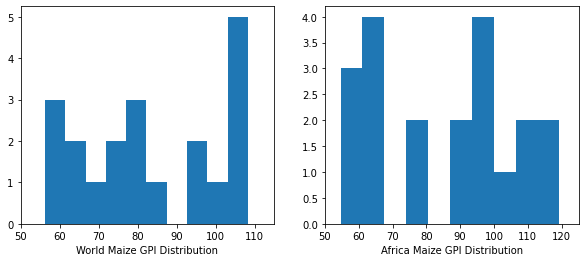

In [44]:
plt.figure(figsize=(10,4))

#bins = np.arange(0, world_maize['gpi'].max()+binsize, binsize)
plt.subplot(1,2,1)
plt.hist(data=world_maize, x='gpi')
plt.xlim(50,115)
plt.xlabel('World Maize GPI Distribution')

plt.subplot(1,2,2)
plt.hist(data=africa_maize, x='gpi');
plt.xlabel('Africa Maize GPI Distribution')
plt.xlim(50,125);

- Majority of the world's gpi of maize for the time peiod fell between 55 and 90 index points. however the highest gpi was recorded out of that range at around 108. Africa saw majority of it's maize production at between 87 and 120 GPI points. Two peaks were recorded at around 63 and 97 GPI points respectively.

In [45]:
world_wheat.describe()

,gpi,change_rate
count,20.00000,19.000000
mean,91.57800,0.015213
std,9.10355,0.058873
min,74.35000,-0.071089
25%,84.34250,-0.016407
50%,92.19500,0.006413
75%,99.30750,0.038390
max,104.41000,0.154001


- World wheat production saw an average growth of 1.5% from 2001 to 2020

In [46]:
africa_wheat.describe()

,gpi,change_rate
count,20.000000,19.000000
mean,91.168000,0.029199
std,13.873441,0.157808
min,65.450000,-0.233453
25%,81.815000,-0.076148
50%,94.955000,0.025287
75%,100.732500,0.140757
max,112.250000,0.326280


- Africa saw an average wheat growth of 2.9% across the time period.

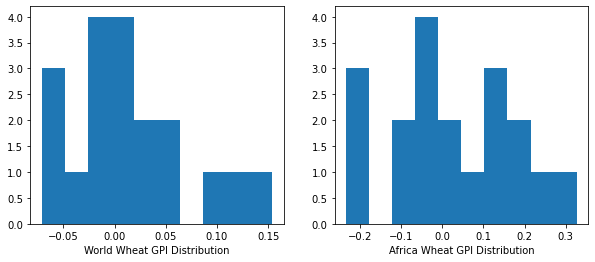

In [47]:
plt.figure(figsize=(10,4))

#bins = np.arange(0, world_maize['gpi'].max()+binsize, binsize)
plt.subplot(1,2,1)
plt.hist(data=world_wheat, x='change_rate')
plt.xlabel('World Wheat GPI Distribution')

plt.subplot(1,2,2)
plt.hist(data=africa_wheat, x='change_rate');
plt.xlabel('Africa Wheat GPI Distribution');

- Africa had a much better growth than the entire world population

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

We first look at the relationship between the numeric variables; gpi and change_rate. Is there a correlation between both variables? We then move on to study how the world and Africa's GPI and pecentage change rate fair year by year for both crops.

In [48]:
numeric_vars = ['gpi', 'change_rate']
categoric_var = ['region', 'cereal', 'year']

We begin the correlation examination with world and Africa maize production

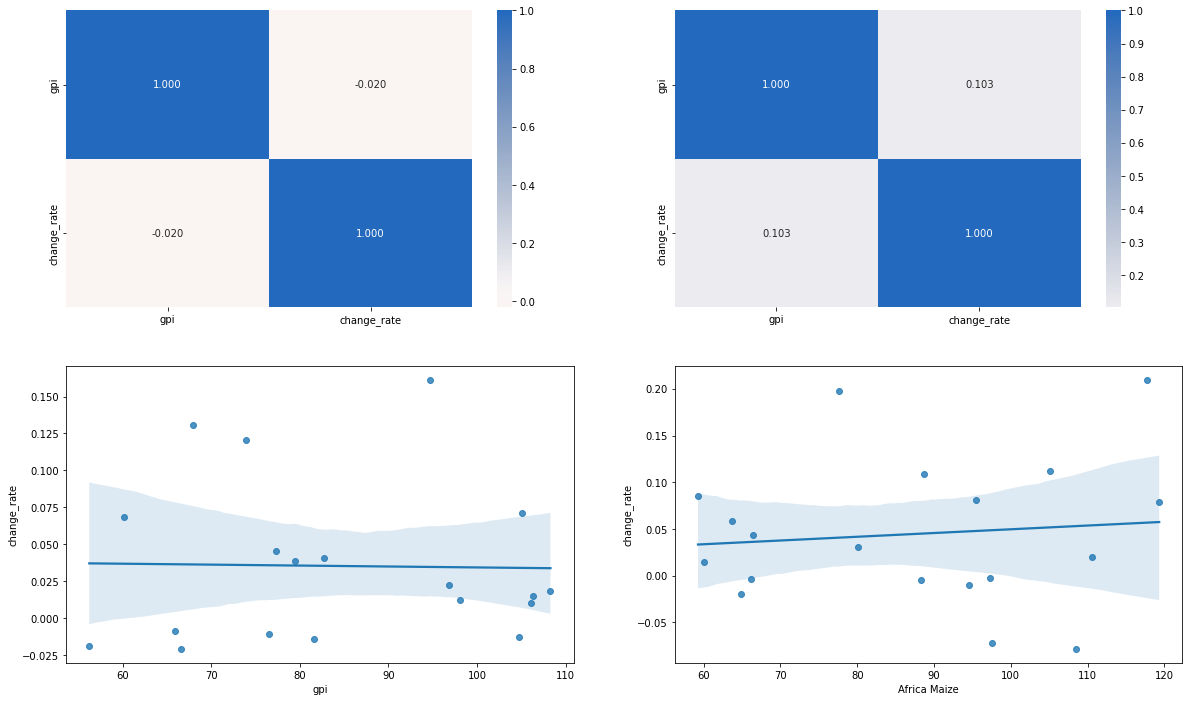

In [49]:
fig,axes = plt.subplots(2,2, figsize=(20,12))

sns.heatmap(world_maize[numeric_vars].corr(), annot =True, center=0, fmt='.3f',cmap='vlag_r',ax=axes[0,0])

sns.heatmap(africa_maize[numeric_vars].corr(), annot =True, center=0, fmt='.3f',cmap='vlag_r',ax=axes[0,1])

sns.regplot(data=world_maize, x='gpi', y='change_rate', ax=axes[1,0])
plt.xlabel('World Maize')

sns.regplot(data=africa_maize, x='gpi', y='change_rate', ax=axes[1,1])

plt.xlabel('Africa Maize');

The was a very low correlation between the GPI of world and Africa maize production figures and their corresponding percentage change rates showing lack of relationship

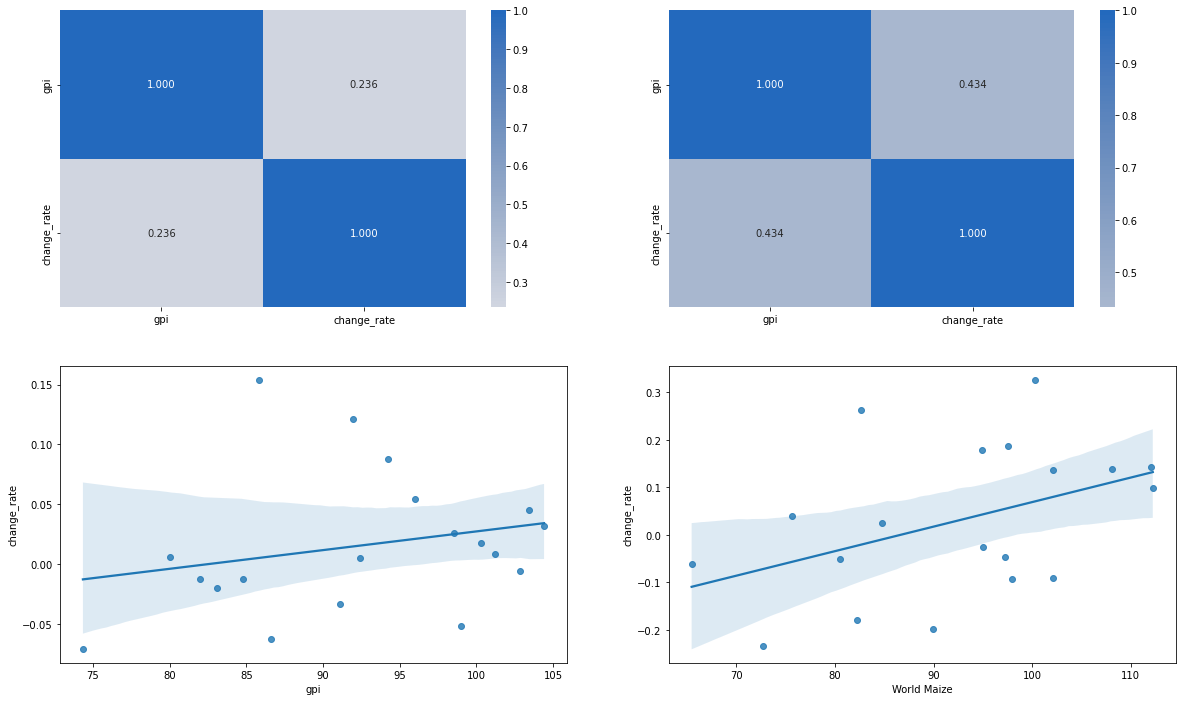

In [50]:
fig,axes = plt.subplots(2,2, figsize=(20,12))

sns.heatmap(world_wheat[numeric_vars].corr(), annot =True, center=0, fmt='.3f',cmap='vlag_r',ax=axes[0,0])

sns.heatmap(africa_wheat[numeric_vars].corr(), annot =True, center=0, fmt='.3f',cmap='vlag_r',ax=axes[0,1])

sns.regplot(data=world_wheat, x='gpi', y='change_rate', ax=axes[1,0])

sns.regplot(data=africa_wheat, x='gpi', y='change_rate', ax=axes[1,1])
plt.xlabel('World Maize');

- World and Africa GPI wheat correlation with  it's corresponding change rate was slightly higher than that of the maize figures but not good enough to be considered to have a strong relationship.

In [51]:
afr_maize.describe()

,gpi,change_rate
count,100.000000,95.000000
mean,87.024400,0.054612
std,24.822439,0.190344
min,39.340000,-0.398050
25%,67.057500,-0.024514
50%,91.035000,0.048938
75%,105.647500,0.103958
max,157.940000,1.175182


Among the five African regions, the mean GPI growth for maize was at 5.5% for the 20yr period

In [52]:
afr_wheat.describe()

,gpi,change_rate
count,100.00000,95.000000
mean,95.02720,0.032644
std,24.95681,0.195102
min,41.86000,-0.361806
25%,82.93250,-0.097095
50%,97.24500,0.012708
75%,111.54250,0.152572
max,163.37000,0.585193


Among the five African regions, the mean GPI growth for wheat was at 3.3% for the 20yr period

We would next try to identify why Africa has a general better average GPI for maize and wheat.

We would examine first the central tendencies of the GPI trend for maize at each year for the time period under study

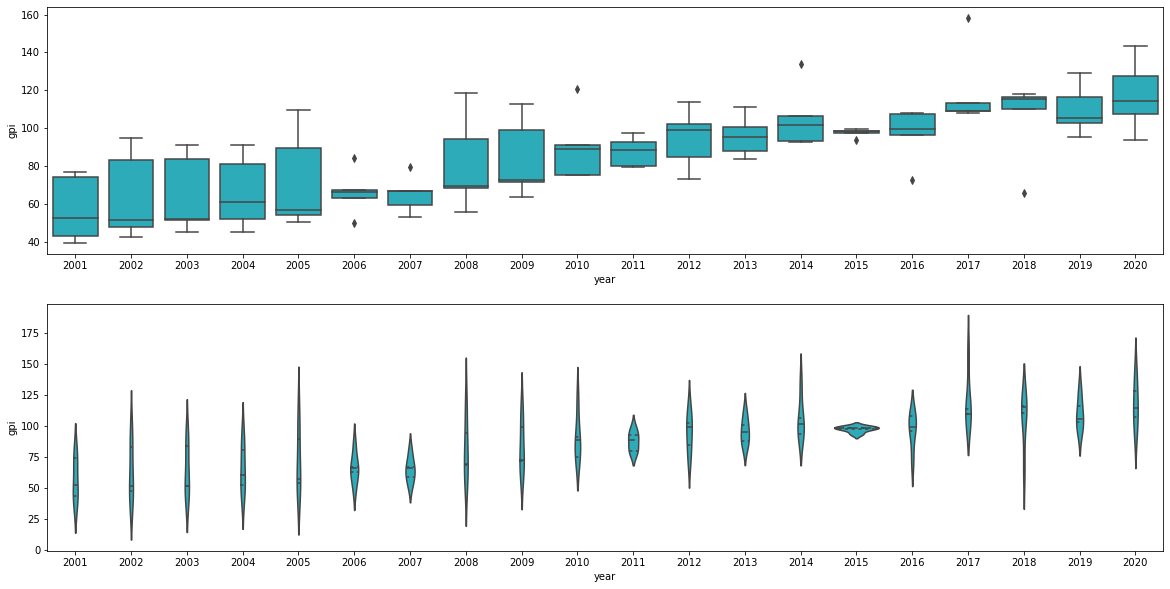

In [53]:
base_color = sns.color_palette()[9]
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.boxplot(data=afr_maize, x='year',y='gpi', color=base_color)

plt.subplot(2,1,2)
sns.violinplot(data=afr_maize, x='year',y='gpi',inner='quartile', color=base_color);

- Year 2015 saw the fattest concentration around the mean GPIas shown by the violin plot. The following three years showed unusual fluctuations with consistent outliers and 2017 showing the highest peak. It'll be interesting to discover the cause of that unusual fluctuation 

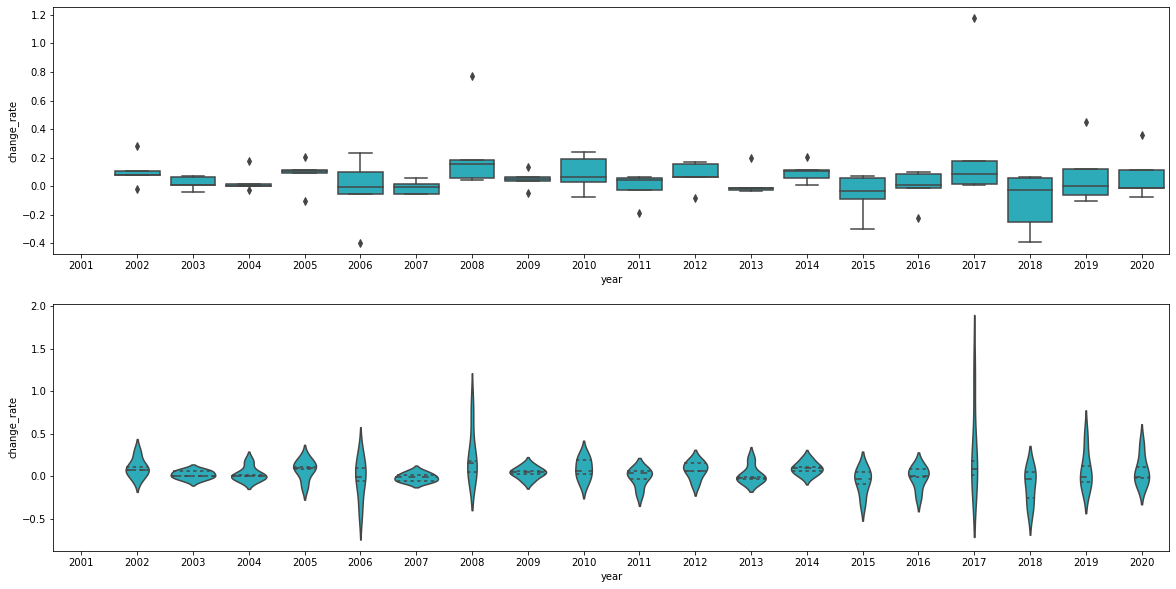

In [54]:
base_color = sns.color_palette()[9]
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.boxplot(data=afr_maize, x='year',y='change_rate', color=base_color)

plt.subplot(2,1,2)
sns.violinplot(data=afr_maize, x='year',y='change_rate',inner='quartile', color=base_color);

- There change rate for the was fairly centered at 0% but then again we notice the very unusual outlier in year 2017

In order to find out how each African region is represented in the data, we can plot a FacetGrid to make comparisons easier

We will start with a FacetGrid for maize GPI values

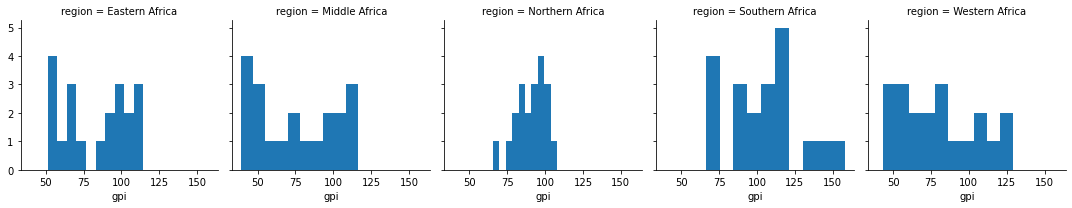

In [55]:
g = sns.FacetGrid(data=afr_maize,col='region')
g.map(plt.hist,'gpi');

- Northern Africa had the most consistent GPI values indicated by the relatively lower rate as compared to the other four region. We also notice that South Africa has had the highest GPI value just above 150 GPI points.

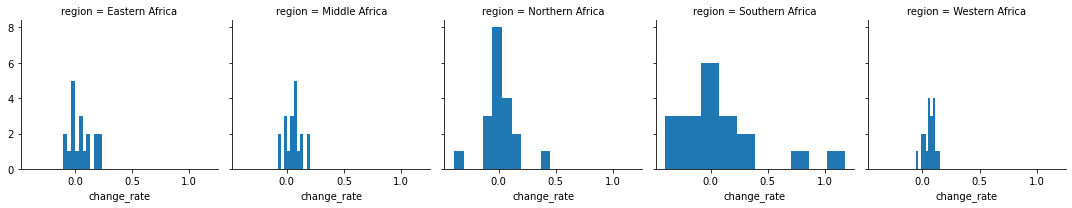

In [56]:
g = sns.FacetGrid(data=afr_maize,col='region')
g.map(plt.hist,'change_rate');

- We confirm the observation made on Northern Africa by examining the FacetGrid of the change rate per region. Northern Africa had highest concentration around 0 GPI units with South Africa possessing the envious title of having the highest percentage change at about 1.1%

We repeat the same process for wheat GPI values for Africa

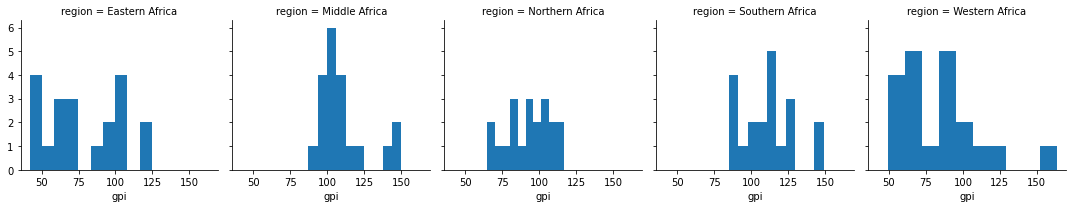

In [57]:
g = sns.FacetGrid(data=afr_wheat,col='region')
g.map(plt.hist,'gpi');

- Middle Africa had the highest concentration of GPI values showing much more consistence in productivity while Western Africa had the highest spread.

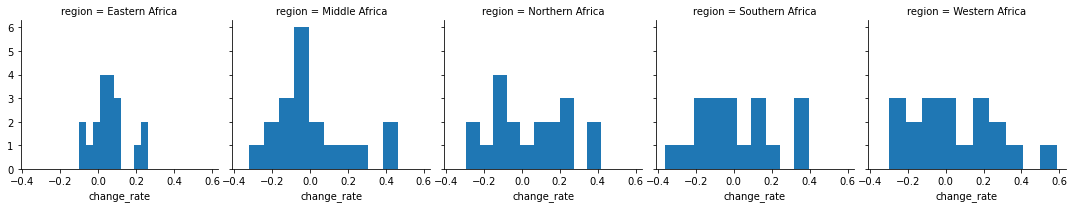

In [58]:
g = sns.FacetGrid(data=afr_wheat,col='region')
g.map(plt.hist,'change_rate');

- In this plot Eastern Africa saw the lowest growth rate spread represented by its distribution while Western Africa saw the highest positive percentage growth at almost 6%

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how both the world and Africa's production of maize and wheat fared across the 20 years and further center on the different regions in Africa to determine the instances of high and low distribution vales in GPI and corresponding percentage rate. Seaborn's line plot will be the main method of visualisation with this exploration.

We start of with examining both the world and Africa's production of maize

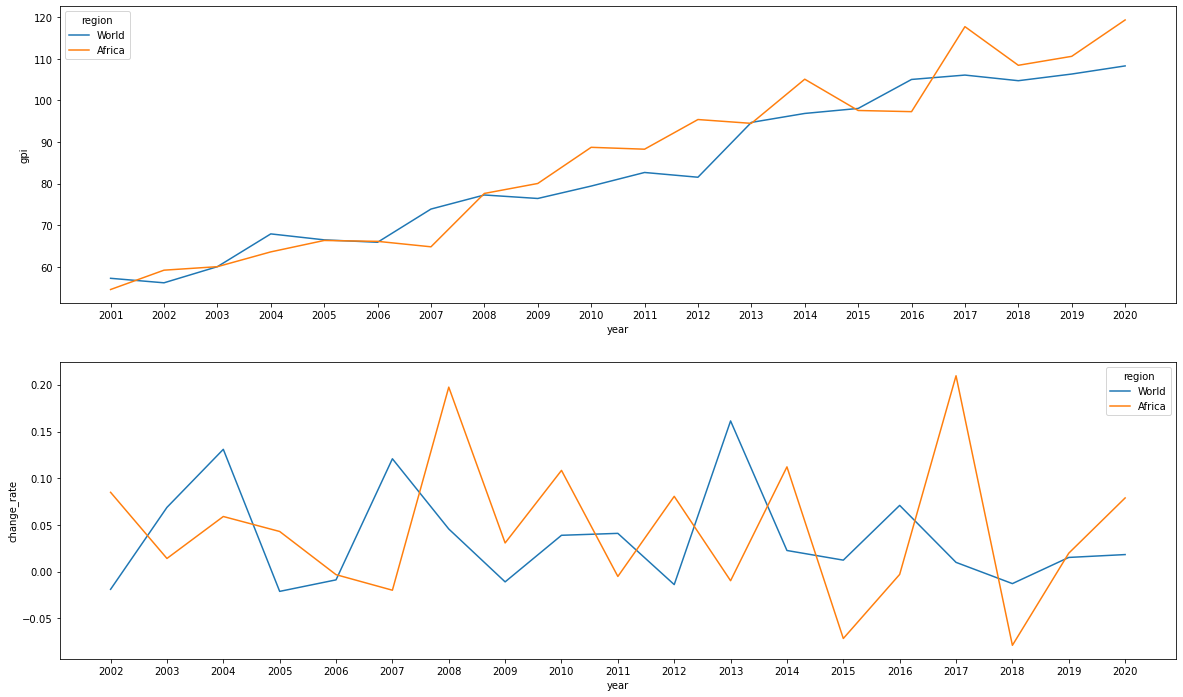

In [59]:
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
sns.lineplot(data=worafr_maize, x='year', y='gpi', hue='region');
#plt.yscale('log')

plt.subplot(2,1,2)
sns.lineplot(data=worafr_maize, x='year', y='change_rate', hue='region');

- Africa saw a more fluctuating growth of maize during the examined time range.  World maize production saw a more stable growth, however, the Africa's production saw a better positive growth at the end of the period under observation.

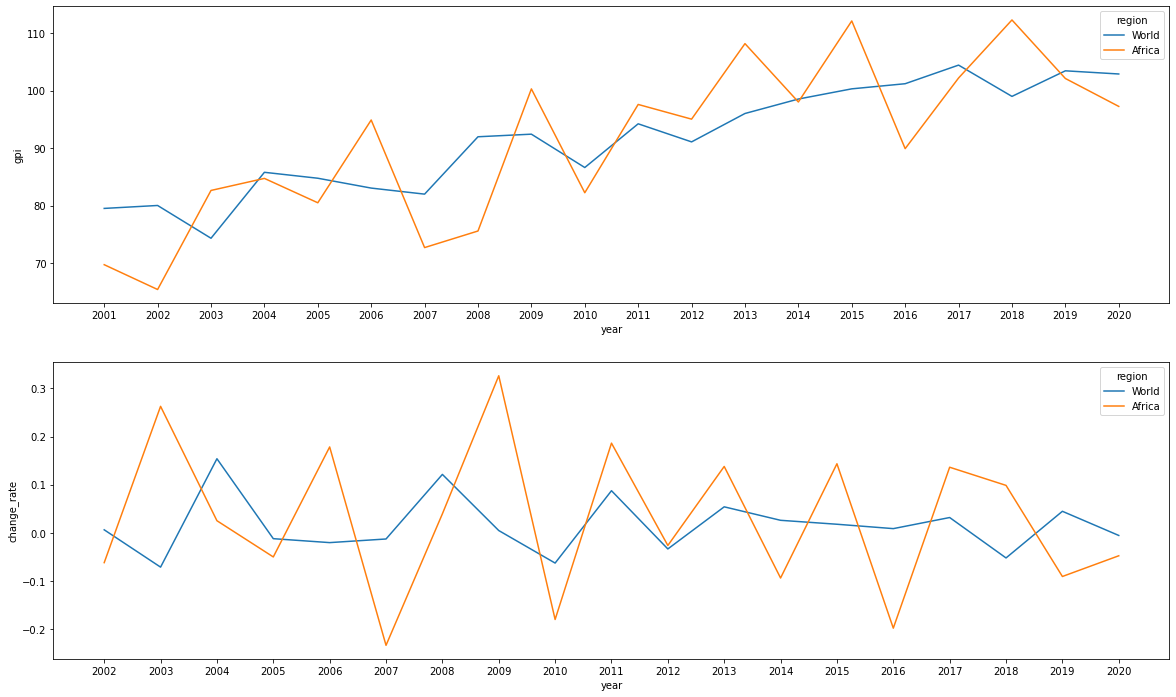

In [60]:
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
sns.lineplot(data=worafr_wheat, x='year', y='gpi', hue='region');
#plt.yscale('log')

plt.subplot(2,1,2)
sns.lineplot(data=worafr_wheat, x='year', y='change_rate', hue='region');

- The data tells quite a different story with wheat. While Africa still has a relatively more fluctuating growt, World production has the highest positive growtha at the end of the time period. 

We then zero in on Africa as a continent to determine the cause of the fluctuations i.e. to specifically find out if there's a particular region responsible.


We begin the fact finding mission with Maize production.

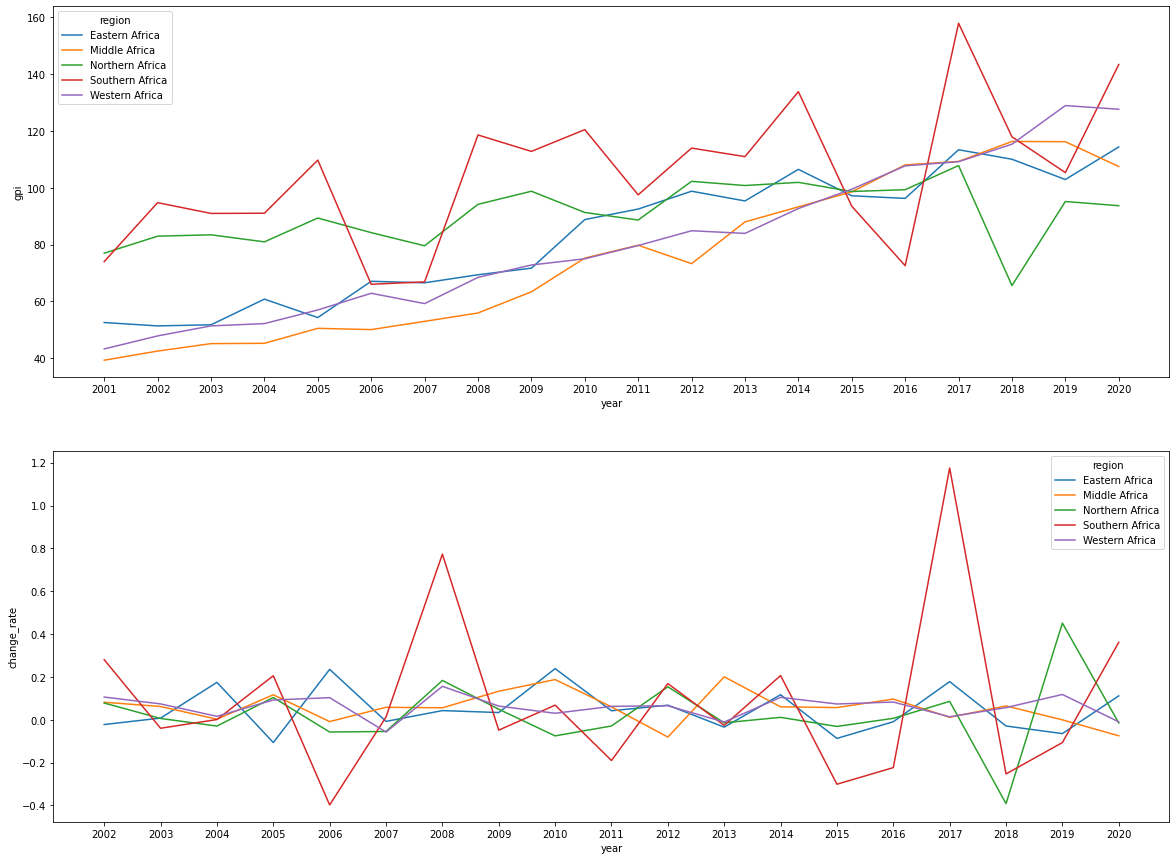

In [61]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.lineplot(data=afr_maize, x='year', y='gpi', hue='region');
#plt.yscale('log')

plt.subplot(2,1,2)
sns.lineplot(data=afr_maize, x='year', y='change_rate', hue='region');

- In 13 out of the 20 years under study, South Africa led African maize production having its highest increase from 2016 to 2017 by about 1% after it had its worst drop from 2014 to 2016 by about 0.2%. Northern Africa saw its worst drop in 2018 by about 0.4% but however recovered almost instantly and significantly the followig year by 1%. Western, Central and Eastern Maize production had a significantly steady growth across the period under study

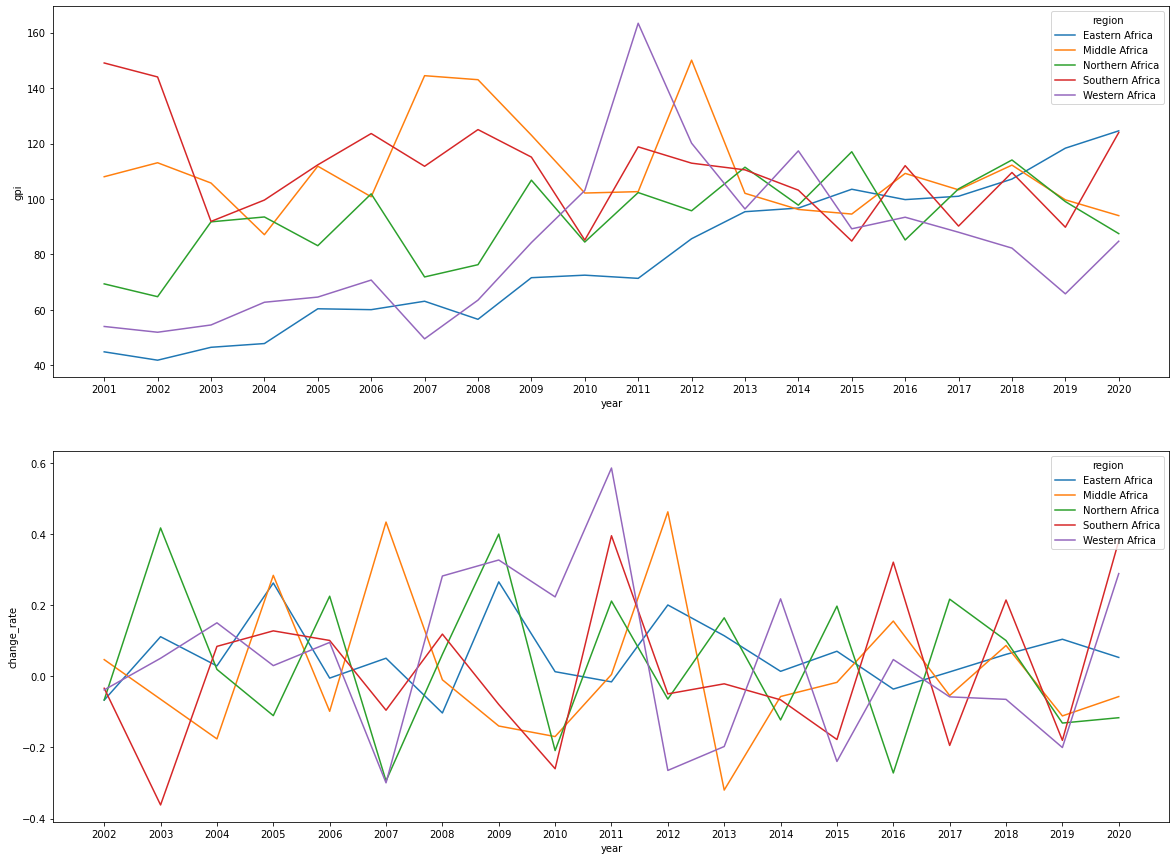

In [62]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.lineplot(data=afr_wheat, x='year', y='gpi', hue='region');
#plt.yscale('log')

plt.subplot(2,1,2)
sns.lineplot(data=afr_wheat, x='year', y='change_rate', hue='region');

- Wheat production among the different regions told a really interesting story. Although Eastern Africa had the lowest production 12 times out of the 20 years recorderd, it ended up topping production leaderboard and handing the un-enviable lowest position to Western Africa which in 2011 was the leading producer among the regions. Western Africa's production rose significantly by around 0.8% from 2007 to 2011 but lost all its gain in 2012 by the same percentage points. From 2013 to 2018 African regions seemed to be producing at thinner ranges of each other. Western Africa and Eastern Africa had the most significant breakoffs in 2018 with Eastern Africa'a being positive and Western Africa's continuing its gradual decline.

We finally save a few dataframes we'll be using in our presentation slides to csv for easy call up

In [63]:
worafr_maize.to_csv('worldafrica_maize.csv',index=False)
worafr_wheat.to_csv('worldafrica_wheat.csv',index=False)
afr_maize.to_csv('africa_maize.csv',index=False)
afr_wheat.to_csv('africa_wheat.csv',index=False)